Accuracy: 0.7963461538461538
              precision    recall  f1-score   support

           0       0.92      0.25      0.39       390
           1       0.77      1.00      0.87      3539
           2       1.00      0.40      0.57      1271

    accuracy                           0.80      5200
   macro avg       0.90      0.55      0.61      5200
weighted avg       0.84      0.80      0.76      5200



,headline,clean,label,pred
4148,Applied Materials Gives Weak Forecast as Short...,applied materials gives weak forecast as short...,0,1
7841,Rockwell Automation (ROK) Q2 Earnings & Sales ...,rockwell automation rok q earnings sales miss ...,0,0
18898,CSX (CSX) Stock Sinks As Market Gains: What Yo...,csx csx stock sinks as market gains what you s...,2,2
4194,5 Things About Take Two Interactive Smart Inve...,things about take two interactive smart invest...,1,1
8409,Pacific Coast Building Products buys $13 milli...,pacific coast building products buys million r...,1,1
24725,2 Reasons XPEL Could Excel,reasons xpel could excel,1,1
2508,Semiconductor Sales Hit All-Time High: 4 Solid...,semiconductor sales hit all time high solid st...,2,1
20879,Investors in PACCAR (NASDAQ:PCAR) have made a ...,investors in paccar nasdaq pcar have made a re...,1,1
17758,Wellmark® Selects Principal® as Workplace Reti...,wellmark selects principal as workplace retire...,1,1
2905,"Omnicom (OMC) Q1 Earnings Surpass Estimates, I...",omnicom omc q earnings surpass estimates incre...,2,1


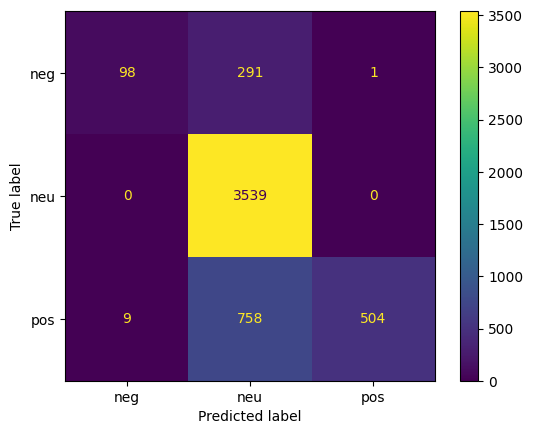

In [3]:
# decision_tree_notebook.py (cell)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# include the shared lexicon block above here (or import)
# ------------------ shared: lexicon labeling ------------------
import re
import pandas as pd
import numpy as np

# Expanded lexicons (you can further expand)
positive_words = [
    "gain","gains","gained","rally","rallies","rallied","growth","growing","rise","rises","rising",
    "soar","soars","soared","surge","surges","surged","jump","jumps","jumped","spike","spikes","spiked",
    "increase","increases","increased","higher","strength","strengthen","strengthened",
    "record","record-high","record breaking","all time high","beat","beats","beating","topped","tops",
    "exceed","exceeds","exceeded","outperform","outperforms","outperformed","above expectations",
    "profit","profits","profitable","margin expansion","raised forecast","upgrade","upgraded","improved",
    "recovery","rebound","bounce back","bullish","optimistic","resilient","solid","robust","momentum",
    "expands","expanding","expansion","success","secured","partnership","acquires","launch","launched",
    "innovation","breakthrough","best","better","stronger","positive","boost","boosted","skyrocket"
]

negative_words = [
    "loss","losses","losing","drop","drops","dropped","decline","declines","declined",
    "fall","falls","fell","selloff","sell-off","plunge","plunges","plunged","tumble","tumbles","tumbled",
    "slump","slumps","slumped","weak","weaker","weakness","downturn","slowdown","cooling demand",
    "missed expectations","miss","misses","missed","earnings miss","cuts forecast","cut forecast",
    "lower guidance","warn","warns","warning","profit slump","loss widening","margin compression",
    "downgrade","downgrades","downgraded","layoff","layoffs","job cuts","fired","recall","recalled",
    "bankrupt","bankruptcy","collapse","collapsed","probe","investigation","lawsuit","sued","sue","sues",
    "fraud","fraudulent","data breach","breach","fine","fined","penalty","risk","risks","uncertainty",
    "volatility","sell pressure","pullback","shortage","shortfall","delays","disruption","spooked"
]

neutral_words = [
    "news","update","report","reports","statement","statements","announces","announce","announcement",
    "says","said","according","reveals","revealed","shows","show","coverage","story","details","highlights",
    "press release","media","article","interview","note","notes","expected","scheduled","meeting","conference"
]

_url_pat = re.compile(r"http\S+|www\.\S+")
_nonalpha_pat = re.compile(r"[^a-z\s]")
_multispace_pat = re.compile(r"\s+")

def clean_text_basic(s: str) -> str:
    s = str(s).lower()
    s = _url_pat.sub(" ", s)
    s = _nonalpha_pat.sub(" ", s)
    s = _multispace_pat.sub(" ", s).strip()
    return s

def create_label(text: str) -> int:
    t = str(text).lower()
    # positive first
    for w in positive_words:
        if w in t:
            return 2
    for w in negative_words:
        if w in t:
            return 0
    for w in neutral_words:
        if w in t:
            return 1
    return 1  # default neutral
# --------------------------------------------------------------
df = pd.read_csv("stock_news.csv")
df = df[["headline"]].dropna().reset_index(drop=True)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train_df["clean"] = train_df["headline"].apply(clean_text_basic)
test_df["clean"]  = test_df["headline"].apply(clean_text_basic)

train_df["label"] = train_df["clean"].apply(create_label).astype(int)
test_df["label"]  = test_df["clean"].apply(create_label).astype(int)

# TF-IDF fewer features (reduce overfitting)
vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1,2), min_df=3)
X_train = vectorizer.fit_transform(train_df["clean"])
X_test  = vectorizer.transform(test_df["clean"])
y_train = train_df["label"]
y_test  = test_df["label"]

model = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

# show a few predictions
out = test_df.copy()
out["pred"] = preds
display(out.head(20))

# optional: confusion matrix visualize
cm = ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=["neg","neu","pos"])
plt.show()